In [206]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

DATASET

In [207]:
data = pd.read_csv("bread basket.csv")
print("DataFrame shape :", data.shape)
data.head()

DataFrame shape : (20507, 5)


,Transaction,Item,date_time,period_day,weekday_weekend
0,1,Bread,30-10-2016 09:58,morning,weekend
1,2,Scandinavian,30-10-2016 10:05,morning,weekend
2,2,Scandinavian,30-10-2016 10:05,morning,weekend
3,3,Hot chocolate,30-10-2016 10:07,morning,weekend
4,3,Jam,30-10-2016 10:07,morning,weekend


In [208]:
#Format data waktu
data['date_time'] = pd.to_datetime(data['date_time'], format= "%d-%m-%Y %H:%M")

In [209]:
data["date_time"].dtype

dtype('<M8[ns]')

In [210]:
data["month"] = data["date_time"].dt.month
data["day"] = data["date_time"].dt.weekday
data["hour"] = data["date_time"].dt.hour
data.head()

,Transaction,Item,date_time,period_day,weekday_weekend,month,day,hour
0,1,Bread,2016-10-30 09:58:00,morning,weekend,10,6,9
1,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
2,2,Scandinavian,2016-10-30 10:05:00,morning,weekend,10,6,10
3,3,Hot chocolate,2016-10-30 10:07:00,morning,weekend,10,6,10
4,3,Jam,2016-10-30 10:07:00,morning,weekend,10,6,10


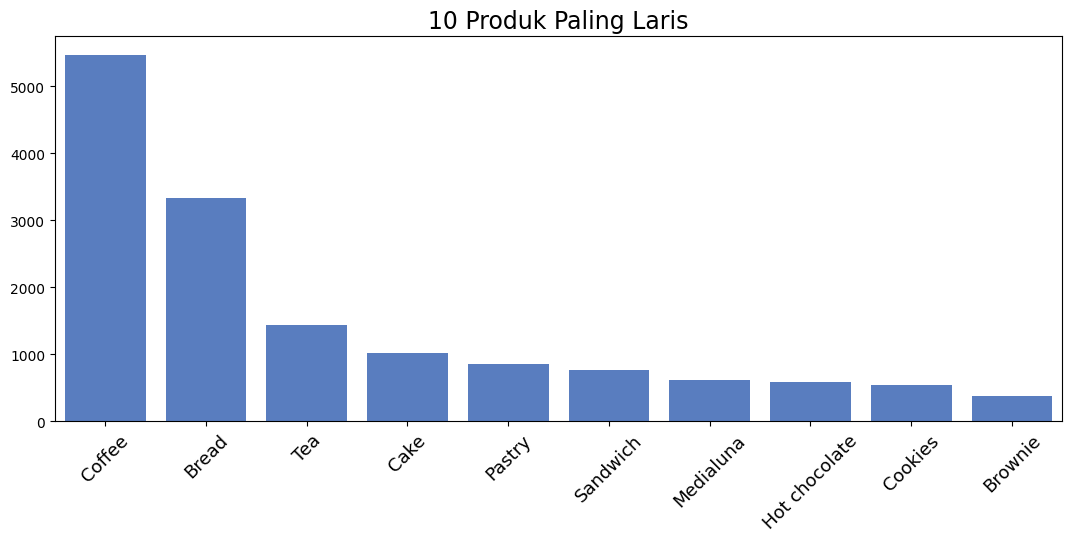

In [211]:
#Menampilkan 10 item paling laris

plt.figure(figsize=(13, 5))
sns.set_palette("muted")

sns.barplot(x = data["Item"].value_counts()[:10].index,
            y = data["Item"].value_counts()[:10].values)

plt.xlabel(""); plt.ylabel("")
plt.xticks(size = 13, rotation = 45)
plt.title('10 Produk Paling Laris', size = 17)
plt.show()

Text(0.5, 1.0, 'Transaksi per Bulan Dari Oktober - April')

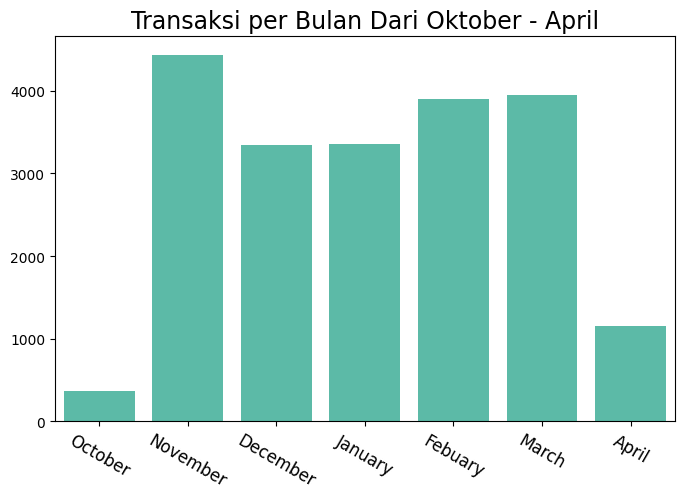

In [212]:
# Transaksi per bulan

data_perbulan = data.groupby("month")["Transaction"].count()
data_perbulan = pd.concat([data_perbulan.iloc[4:], data_perbulan.iloc[:4]])

plt.figure(figsize=(8, 5))
sns.barplot(
    x = ["October", "November", "December", "January", "Febuary", "March", "April"],
    y = data_perbulan.values, color="#4dc9b0")

plt.xticks(size = 12, rotation = -30)
plt.title("Transaksi per Bulan Dari Oktober - April", size = 17)

Text(0.5, 1.0, 'Transaksi per PerHari')

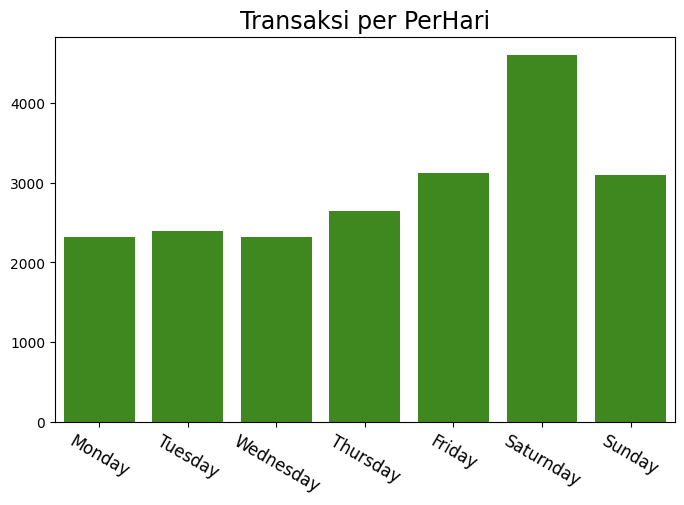

In [213]:
# Transaksi Per Hari

data_perhari = data.groupby("day")["Transaction"].count()

plt.figure(figsize=(8, 5))
sns.barplot(
    x = ["Monday", "Tuesday", "Wednesday", "Thursday", "Friday", "Saturnday", "Sunday"],
    y = data_perhari.values, color="#38990d")

plt.xticks(size = 12, rotation = -30)
plt.title("Transaksi per PerHari", size = 17)


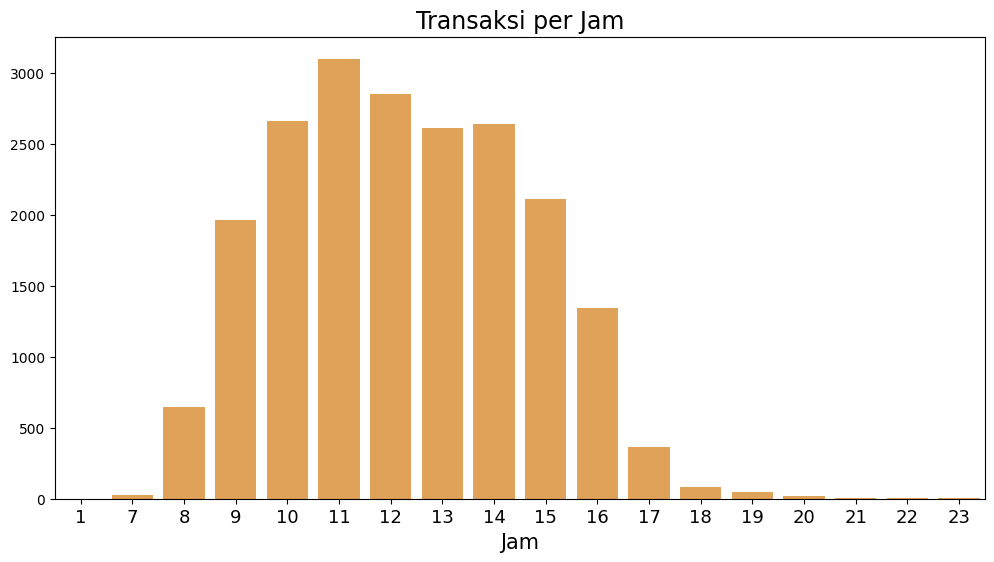

In [214]:
# Transaksi per Jam

data_perjam = data.groupby("hour")["Transaction"].count()

plt.figure(figsize=(12, 6))
sns.barplot(x = data_perjam.index, y = data_perjam.values, color = "#f6a343")

plt.xlabel("Jam", size = 15)
plt.xticks(size = 13)
plt.title("Transaksi per Jam", size = 17)
plt.show()

**Pengolahan Algoritma Association Rule Apriori**

In [215]:
data["Item"] = data["Item"].apply(lambda item: item.lower())

In [216]:
data["Item"] = data["Item"].apply(lambda item: item.strip())

In [217]:
data = data[["Transaction", "Item"]].copy()
data.head(10)

,Transaction,Item
0,1,bread
1,2,scandinavian
2,2,scandinavian
3,3,hot chocolate
4,3,jam
5,3,cookies
6,4,muffin
7,5,coffee
8,5,pastry
9,5,bread


In [218]:
import mlxtend
from mlxtend.frequent_patterns import association_rules, apriori   
print(mlxtend.__version__) 

0.23.3


In [219]:
item_count = data.groupby(["Transaction", "Item"])["Item"].count().reset_index(name = "Count")
item_count.head(10)

,Transaction,Item,Count
0,1,bread,1
1,2,scandinavian,2
2,3,cookies,1
3,3,hot chocolate,1
4,3,jam,1
5,4,muffin,1
6,5,bread,1
7,5,coffee,1
8,5,pastry,1
9,6,medialuna,1


In [220]:
item_count_pivot = item_count.pivot_table(index = "Transaction", columns = "Item", values = "Count", aggfunc = "sum").fillna(0)
print("Ukuran Dataset :", item_count_pivot.shape)
item_count_pivot.head(5)

Ukuran Dataset : (9465, 94)


Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [221]:
item_count_pivot = item_count_pivot.astype("bool")
item_count_pivot.head(5)

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [222]:
def encode(x):
    return 1 if x > 0 else 0
item_count_pivot = item_count_pivot.map(encode)
item_count_pivot.head(5)

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
5,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [223]:
def encode(x):
    return x > 0  # Menghasilkan True/False
item_count_pivot = item_count_pivot.map(encode)
item_count_pivot.head(5)

Item,adjustment,afternoon with the baker,alfajores,argentina night,art tray,bacon,baguette,bakewell,bare popcorn,basket,...,the bart,the nomad,tiffin,toast,truffles,tshirt,valentine's card,vegan feast,vegan mincepie,victorian sponge
Transaction,,,,,,,,,,,,,,,,,,,,,
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
5,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [224]:
print(item_count_pivot.dtypes)


Item
adjustment                  bool
afternoon with the baker    bool
alfajores                   bool
argentina night             bool
art tray                    bool
                            ... 
tshirt                      bool
valentine's card            bool
vegan feast                 bool
vegan mincepie              bool
victorian sponge            bool
Length: 94, dtype: object


In [225]:
print("Ukuran Dataset :", item_count_pivot.shape)
print("Jumlah Transaksi :", item_count_pivot.shape[0])
print("Jumlah Item :", item_count_pivot.shape[1])

Ukuran Dataset : (9465, 94)
Jumlah Transaksi : 9465
Jumlah Item : 94


In [226]:
support = 0.01
frequent_items = apriori(item_count_pivot, min_support = support, use_colnames = True)
frequent_items.sort_values("support", ascending = False).head(10)

,support,itemsets
6,0.478394,(coffee)
2,0.327205,(bread)
26,0.142631,(tea)
4,0.103856,(cake)
34,0.090016,"(coffee, bread)"
19,0.086107,(pastry)
21,0.071844,(sandwich)
16,0.061807,(medialuna)
12,0.058320,(hot chocolate)
42,0.054728,"(coffee, cake)"


In [227]:
metric = "lift"
min_threshold = 1

rules = association_rules(frequent_items, num_itemsets=len(frequent_items), metric="lift", min_threshold=1)
rules = rules[["antecedents", "consequents", "support", "confidence", "lift"]]
rules.sort_values("confidence", ascending=False, inplace=True)
print(rules.head(15))


         antecedents consequents   support  confidence      lift
31           (toast)    (coffee)  0.023666    0.704403  1.472431
29  (spanish brunch)    (coffee)  0.010882    0.598837  1.251766
19       (medialuna)    (coffee)  0.035182    0.569231  1.189878
23          (pastry)    (coffee)  0.047544    0.552147  1.154168
0        (alfajores)    (coffee)  0.019651    0.540698  1.130235
17           (juice)    (coffee)  0.020602    0.534247  1.116750
25        (sandwich)    (coffee)  0.038246    0.532353  1.112792
7             (cake)    (coffee)  0.054728    0.526958  1.101515
27           (scone)    (coffee)  0.018067    0.522936  1.093107
12         (cookies)    (coffee)  0.028209    0.518447  1.083723
15   (hot chocolate)    (coffee)  0.029583    0.507246  1.060311
5          (brownie)    (coffee)  0.019651    0.490765  1.025860
21          (muffin)    (coffee)  0.018806    0.489011  1.022193
3           (pastry)     (bread)  0.029160    0.338650  1.034977
10            (cake)     